<a href="https://colab.research.google.com/github/jfdoppler/DNL-1c2020/blob/master/POD_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proper Orthonormal Decomposition**

## **(Descomposición en modos empíricos)**

Ejemplo sencillo para ilustrar el poder de esta técnica

Supongamos que tenemos mediciones $u(x,t)$ de un fenómeno con una cierta resolución espacial y resolucíon temporal.

La idea de la técnica es utilizar una base de modos dada por los datos en vez de una base genérica como la que uno utiliza, por ejemplo, en la descomposición de Fourier (senos y cosenos).

Es decir, supongamos que podemos escribir nuestras mediciones $u(x,t)$ como descompuesta en una base de funciones espaciales y amplitudes que varían en el tiempo:

$$
u(x,t) = \Sigma_j a_j(t)\phi_j(x)
$$

Para encontrar las funciones $\phi_j(x)$ vamos a proponer una base tal que se maximice la proyección promedio del conjunto de mediciones $u(x,t)$ en la base. Es decir, definiendo el producto escalar:

$$
(f,g)=\int_0^1f(x)g^*(x)dx
$$

queremos minimizar:

$$
\frac{<|(u,\phi)^2|>}{||\phi||^2}
$$

con $||\phi||^2=(\phi,\phi^*)$. Esta condición nos lleva a pedir, por un lado, que los modos en que descompongamos cumplan $||\phi||^2=1$ y que:

$$
\int_0^1<u(x)u^*(x')>\phi(x')dx' - \lambda\phi(x)=0
$$

### **Método de los snapshots**

¿Cómo podemos, entonces, encontrar la base de los $\phi(x)$?

Un método posible (Sirovich) consiste en reducir el problema a una serie de mediciones temporales discretas, ($M$) de todas las tomadas.

De esta manera, se plantea reconstruir los modos como:

$$
\phi(x)=\Sigma_k^Mv_ku_k=\Sigma_k^Mv_ku(x,t_k)
$$

Reemplazando esto en la ecuación de autovalores, terminamos llegando a la relación:

$$
\Sigma_k^M\frac{1}{M}(u^i,u^k)v_k=\lambda v_i
$$

Que no es más que una ecuación de autovalores y autovectores de la matriz de correlación $(u^i,u^k)$.

En resumen, el procedimiento consiste de las N mediciones tomar M snapshots que permitan definir los modos a partir de los autovectores de la matriz de correlación que acompañen a los autovalores de mayor módulo (típicamente haremos un corte al nivel de cuántos modos activos consideremos relevantes para la reconstrucción).

In [ ]:
#La primer celda de código trae las librerías 
import numpy as np
import matplotlib.pyplot as plt
from random import sample
import scipy.integrate as integrate
import math

In [ ]:
#Definimos el valor de los parámetros del modelo
x = np.linspace(0,1,10000) # vector de resolucion espacial
t = np.linspace(0,2*np.pi,1000) # vector de resolucion temporal
# Creamos un ejemplo que conocemos para luego reconstruir:
u1 = np.sqrt(2)*np.sin(np.pi*x)
u2 = np.sqrt(2)*np.sin(2*np.pi*x)

f=np.zeros((10000,1000))
for k in range(len(t)):
  # definimos una evolucion temporal de estos dos modos
  f[:,k]=u1*np.cos(t[k])+u2*np.sin(t[k])

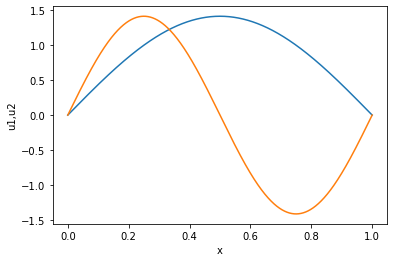

In [ ]:
_ = plt.plot(x,u1)
_ = plt.plot(x,u2)
plt.xlabel('x')
plt.ylabel('u1,u2')
plt.show()

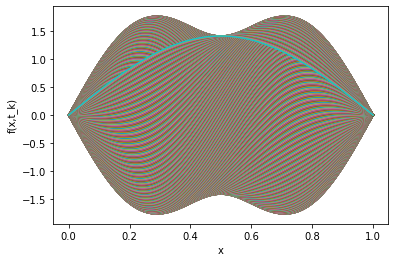

In [ ]:
plt.xlabel('x')
plt.ylabel('f(x,t_k)')
_= plt.plot(x,f)

In [ ]:
#De toda esta cosa queremos recuperar la evolucion de los modos:
# tomamos 10 snapshots al azar
a=sample(range(len(t)),20)
a.sort()
print(a)
snapshots=f[:,a]
matriz=np.zeros((len(a),len(a)))
# calculemos la matriz de correlacion de estas snapshots
for i in range(len(snapshots[0])):
  for j in range(len(snapshots[0])):
    matriz[i,j]=(1/len(a))*integrate.trapz(snapshots[:,i]*snapshots[:,j],x)

w,v = np.linalg.eig(matriz)
modo_1=np.matmul(snapshots,v[:,1])
modo_2=np.matmul(snapshots,v[:,2])
# normalizamos cada modo para que cumplan con norma 1
norm_1=integrate.trapz(modo_1*modo_1,x)
norm_2=integrate.trapz(modo_2*modo_2,x)
modo_1=(1/np.sqrt(abs(norm_1)))*modo_1
modo_2=(1/np.sqrt(abs(norm_2)))*modo_2

#
amp_1=np.zeros((len(t)))
amp_2=np.zeros((len(t)))
for k in range(len(t)):
  amp_1[k]=integrate.trapz(f[:,k]*modo_1,x)
  amp_2[k]=integrate.trapz(f[:,k]*modo_2,x)

[66, 78, 180, 268, 383, 412, 438, 525, 535, 545, 602, 648, 687, 703, 747, 812, 813, 822, 842, 996]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: ComplexWarning: Casting complex values to real discards the imaginary part


In [ ]:
print(matriz)

NameError: ignored

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


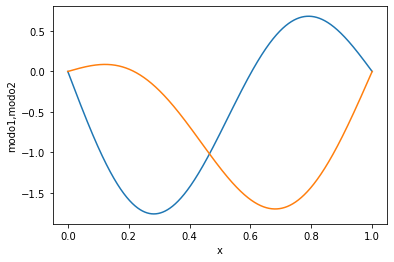

In [ ]:
# Miremos los modos reconstruidos
plt.plot(x,modo_1)
plt.plot(x,modo_2)
plt.xlabel('x')
plt.ylabel('modo1,modo2')
_=plt.show()

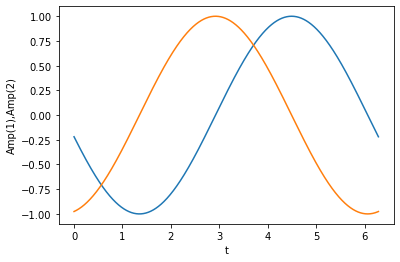

In [ ]:
# Ploteamos la amplitud de los modos en funcion del tiempo
plt.plot(t,amp_1)
plt.plot(t,amp_2)
plt.xlabel('t')
plt.ylabel('Amp(1),Amp(2)')
_=plt.show()

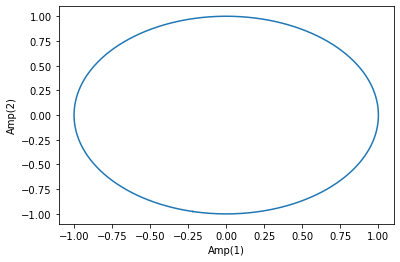

In [ ]:
# Ploteamos amp1 vs amp2
plt.xlabel('Amp(1)')
plt.ylabel('Amp(2)')
_=plt.plot(amp_1,amp_2)